# Transform Data from Google Maps Platform

GoogleMapPlatform (or GoogleMaps) allows its users to extract their own geolocation data collected through the years. This notebook uses the author's personal data, but you should be able to extract your own data on link below: 

> https://myaccount.google.com/yourdata/maps

In [1]:
import pandas as pd
import json
from tqdm import tqdm

In [2]:
path_in = '../data/raw/Records.json'
read = open(path_in, 'r')
data = json.load(read)

## Overview of Raw Data

In [3]:
data['locations'][0]

{'latitudeE7': -235822740,
 'longitudeE7': -466856661,
 'accuracy': 67,
 'activity': [{'activity': [{'type': 'STILL', 'confidence': 62},
    {'type': 'IN_VEHICLE', 'confidence': 31},
    {'type': 'ON_FOOT', 'confidence': 8},
    {'type': 'WALKING', 'confidence': 8}],
   'timestamp': '2016-06-21T21:02:53.977Z'}],
 'source': 'WIFI',
 'deviceTag': -1740635755,
 'timestamp': '2016-06-21T21:02:54.337Z'}

A few questions:
1. How many data points are available?
2. How are they distributed through the time?


In [4]:
len(data['locations'])

430498

In [5]:
list_date = []

for i in tqdm(range(len(data['locations']))):
    list_date.append(data['locations'][i]['timestamp'])    

100%|██████████| 430498/430498 [00:00<00:00, 3587529.52it/s]


In [6]:
df = pd.DataFrame(list_date, columns=['date'])
df['date'] = df['date'].astype('datetime64[s]')
df['year'] = df['date'].dt.year
df.head()

,date,year
0,2016-06-21 21:02:54,2016
1,2016-06-21 21:05:08,2016
2,2016-06-21 21:07:17,2016
3,2016-06-21 21:07:44,2016
4,2016-06-21 21:08:59,2016


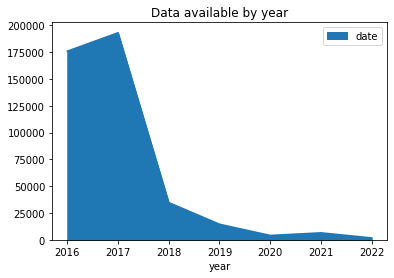

In [7]:
df_plot = df.groupby('year').agg({'date':'count'}).reset_index(drop=False)
fig = df_plot.plot(x='year', y='date', kind='area', title='Data available by year')

## Obtaining Latitude and Longitude

In [8]:
data['locations'][0]

{'latitudeE7': -235822740,
 'longitudeE7': -466856661,
 'accuracy': 67,
 'activity': [{'activity': [{'type': 'STILL', 'confidence': 62},
    {'type': 'IN_VEHICLE', 'confidence': 31},
    {'type': 'ON_FOOT', 'confidence': 8},
    {'type': 'WALKING', 'confidence': 8}],
   'timestamp': '2016-06-21T21:02:53.977Z'}],
 'source': 'WIFI',
 'deviceTag': -1740635755,
 'timestamp': '2016-06-21T21:02:54.337Z'}

In [9]:
list_lat = []
list_long = []

for i in tqdm(data['locations']):
    list_lat.append(i['latitudeE7'])
    list_long.append(i['longitudeE7'])

100%|██████████| 430498/430498 [00:00<00:00, 3188992.57it/s]


In [10]:
df['latitude'] = pd.Series(list_lat)
df['longitude'] = pd.Series(list_long)

df.head()

,date,year,latitude,longitude
0,2016-06-21 21:02:54,2016,-235822740,-466856661
1,2016-06-21 21:05:08,2016,-235853147,-466884743
2,2016-06-21 21:07:17,2016,-235850464,-466910407
3,2016-06-21 21:07:44,2016,-235845803,-466917750
4,2016-06-21 21:08:59,2016,-235864830,-466955541


## Saving Data in 'intermediate' folder

In [11]:
path_out = '../data/intermediate/data_intermediate.csv'
df.to_csv(path_out, sep=';', index=False)